Многоклассовая классификация

1.загрузите из sklearn датасет с цифрами (каждый элемент кодирует изображение цифры размером 8х8)

(подсказка from sklearn.datasets import load_digits)

Осмотрите данные и метки.

попробуйте отобразить любое единичное изображение из набора с помощью matplotlib.

Примените тетрадку с прошлого урока к загруженному датасету в части многоклассовой классификации. 

Рассмотрите матрицу неточностей, сделайте выводы какие цифры классификатор принимает за другие наиболее часто.

Сравните качество стратегий OvR и OvO.


In [13]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

In [14]:
load_digits

<function sklearn.datasets._base.load_digits(*, n_class=10, return_X_y=False, as_frame=False)>

In [15]:
X_nu, y_nu = load_digits(return_X_y = True)

In [37]:
y[560]

7

In [35]:
n = 560
x_show = X_nu[n]
x_show = x_show.reshape(8,8)


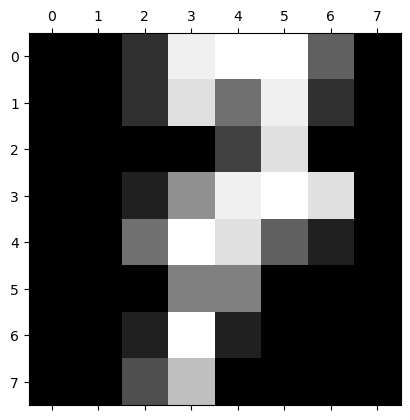

In [36]:

plt.matshow(x_show)
plt.gray()
plt.show()

In [31]:
X, y = load_digits(return_X_y = True, as_frame = True)
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [19]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [21]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier (random_state = 42)

In [32]:
SGDclf.fit(X,y)

SGDClassifier(random_state=42)

In [33]:
SGDclf.score(X,y)

0.9699499165275459

In [38]:
pred = SGDclf.predict(X)

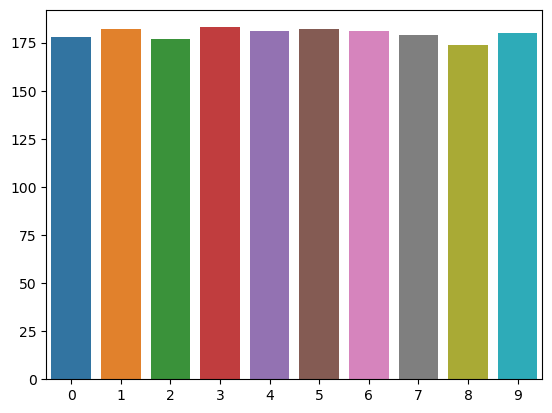

In [12]:
y_y = pd.Series(y).value_counts()
sns.barplot(x=y_y.index, y=y_y.values);

Ввиду практически  идеального баланса классов, метрика micro avg является выбором



In [39]:
cm = confusion_matrix(y, pred)
print(classification_report(y, pred), cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.99      0.90      0.94       182
           2       0.99      0.99      0.99       177
           3       0.99      0.91      0.95       183
           4       1.00      0.96      0.98       181
           5       0.97      0.99      0.98       182
           6       0.99      0.99      0.99       181
           7       0.99      0.98      0.98       179
           8       0.85      0.99      0.92       174
           9       0.94      0.98      0.96       180

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797
 [[178   0   0   0   0   0   0   0   0   0]
 [  0 164   1   1   0   0   0   0  14   2]
 [  0   0 176   0   0   0   0   0   1   0]
 [  0   0   0 166   0   5   0   1   8   3]
 [  0   1   0   0 174   1   1   1   1   2]
 [  0   0   0   0   0 180 

## неплохая точность, хотя судить еще нельзя 

In [40]:
from sklearn.multiclass import OneVsOneClassifier 

In [50]:
ovoSGD = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovoSGD.fit(X,y) 

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [51]:
pred_new1 = ovoSGD.predict(X)
cm_new1 = confusion_matrix(y, pred_new1)

In [52]:
print(classification_report(y, pred_new1), cm_new1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00       181
           5       1.00      1.00      1.00       182
           6       1.00      1.00      1.00       181
           7       1.00      1.00      1.00       179
           8       1.00      1.00      1.00       174
           9       1.00      1.00      1.00       180

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797
 [[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182 

## Подозрительно хорошо 
# проверим

In [53]:
X_train = X.iloc[:1500] 
y_train = y.iloc[:1500]
X_pred = X.iloc[1500:]
y_pred = y.iloc[1500:]

In [56]:
newovoSGD = OneVsOneClassifier(SGDClassifier(random_state = 42))
newovoSGD.fit(X_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [57]:
pred_new_pred1 = newovoSGD.predict(X_pred)
cm_new_pred = confusion_matrix(y_pred, pred_new_pred1)


In [58]:
print(classification_report(y_pred, pred_new_pred1),cm_new_pred)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.89      1.00      0.94        31
           2       1.00      1.00      1.00        27
           3       0.96      0.83      0.89        30
           4       0.97      0.91      0.94        33
           5       0.97      1.00      0.98        30
           6       0.97      0.97      0.97        30
           7       0.96      0.90      0.93        30
           8       0.84      0.93      0.88        28
           9       0.88      0.94      0.91        31

    accuracy                           0.94       297
   macro avg       0.94      0.94      0.94       297
weighted avg       0.94      0.94      0.94       297
 [[25  0  0  0  1  0  1  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  1  0 25  0  1  0  1  2  0]
 [ 0  0  0  0 30  0  0  0  0  3]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  1  0  0  0  0 29  0  0  0]
 [ 0  0  0

## проверим градиентный спуск 

In [60]:
newSGDclf = SGDClassifier (random_state = 42)
newSGDclf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [61]:
new_pred = newSGDclf.predict(X_pred)
matr_conf = cm = confusion_matrix(y_pred, new_pred)

In [63]:
print(classification_report(y_pred, new_pred), matr_conf)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.81      0.94      0.87        31
           2       1.00      1.00      1.00        27
           3       0.71      0.67      0.69        30
           4       0.94      0.91      0.92        33
           5       0.91      1.00      0.95        30
           6       0.97      1.00      0.98        30
           7       0.90      0.93      0.92        30
           8       0.78      0.89      0.83        28
           9       0.86      0.61      0.72        31

    accuracy                           0.89       297
   macro avg       0.89      0.89      0.88       297
weighted avg       0.89      0.89      0.88       297
 [[25  0  0  0  1  0  1  0  0  0]
 [ 0 29  0  2  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  1  0 20  0  3  0  2  4  0]
 [ 0  0  0  0 30  0  0  0  0  3]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  1  0

## OVO справился получше , чем SGD и DecisionTreeClassifier


#   SGD  9 принимает за другие цифры  

# c 3 такая же беда 

In [65]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
clf_pred = clf.predict(X_pred)

In [67]:
conf_matr = confusion_matrix(y_pred, clf_pred)

In [68]:
print(classification_report(y_pred, clf_pred), conf_matr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.77      0.65      0.70        31
           2       0.74      0.74      0.74        27
           3       0.60      0.50      0.55        30
           4       0.85      0.85      0.85        33
           5       0.70      0.87      0.78        30
           6       0.93      0.83      0.88        30
           7       0.64      0.83      0.72        30
           8       0.56      0.50      0.53        28
           9       0.79      0.74      0.77        31

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.74       297
weighted avg       0.75      0.75      0.74       297
 [[26  0  0  0  0  0  0  1  0  0]
 [ 0 20  3  1  1  0  0  0  5  1]
 [ 2  0 20  2  0  0  0  2  1  0]
 [ 0  2  1 15  1  3  0  6  2  0]
 [ 0  0  0  0 28  0  1  2  0  2]
 [ 0  0  1  1  0 26  1  0  0  1]
 [ 0  0  1  0  1  1 25  0  2  0]
 [ 0  0  0

# Было интересно, как справится дерево, дерево вообще не справилось
